# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [ ]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    area = (x_lim[-1] - x_lim[0])*(y_lim[-1] - y_lim[0])
    number_of_points = np.random.poisson(intensity*area)
    x = np.random.uniform(x_lim[0], x_lim[-1], number_of_points)
    y = np.random.uniform(y_lim[0], y_lim[-1], number_of_points)
    points = pd.DataFrame({"X" : x, "Y" : y})
    return points

### Wczytanie danych
Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_HP` - jednorodny rozkład Poissona,
 - `points_R` - rozkład regularny z komponentem losowym,
 - `points_M` - rozkład Materna,

wygenerowane dla zakresu współrzędnych X $[10, 20]$ i Y $[-20, -10]$ oraz dane wykorzystywane w zawartych w notatniku automatycznych testach.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [2]:
points_HP = pd.read_pickle('points_HP.pkl')
points_R = pd.read_pickle('points_R.pkl')
points_M = pd.read_pickle('points_M.pkl')

test_data_1 = pd.read_pickle('test_data_1.pkl')
test_data_2 = pd.read_pickle('test_data_2.pkl')

### Zadanie 1: Funkcja G (18 pkt)

#### a) Przygotowanie funkcji
Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona.

Algorytm postępowania:
- Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
- Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.
- Konstruujemy funkcję G jednorodnego rozkładu Poissona daną wzorem:<br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$<br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.
    
Uwagi do wykonania zadania:
- Generowane dane powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.
- Projektując funkcję `g_function()` uwzględnij fakt, że wiele punktów może mieć najbliższego sąsiada w takiej samej odległości.
- W procesie wyliczania dystansów do najbliższego sąsiada należy wykorzystać maksymalnie jedną pętlę `for` iterującą po kolejnych punktach, dla których wyliczamy dystans do ich najbliższego sąsiada. Nie należy korzystać z pętli `for` do wyliczania odległości pomiędzy poszczególnymi parami punktów.

In [4]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    min_dist = np.array([])
    for point in points.values:
        dist = ((points.values[:,0]-point[0])**2+(points.values[:,1]-point[1])**2)**0.5
        dist = dist[dist!=0]
        min_dist = np.append(min_dist,np.min(dist))
    D = np.append([0],(np.unique(min_dist)))
    G = [len(min_dist[min_dist<=x])/len(points) for x in D]
    g = pd.DataFrame({"D":D,"G":G})
    return g
    
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    G = 1 - np.exp(-intensity*np.pi*d*d)
    g = pd.DataFrame({"D":d,"G":G})
    return g


In [4]:
# Komórka testowa
test_results_1 = g_function(test_data_1)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (241, 2)
assert list(test_results_1.columns) == ["D", "G"]
assert np.isclose(test_results_1["D"].min(), 0.0)
assert np.isclose(test_results_1["D"].max(), 0.7588723960188973)
assert np.isclose(test_results_1["D"].mean(), 0.3050733863367381)
assert np.isclose(test_results_1["G"].min(), 0.0)
assert np.isclose(test_results_1["G"].max(), 1.0)
assert np.isclose(test_results_1["G"].mean(), 0.5474945047194762)

test_results_2 = g_function_poisson(np.linspace(0, np.max(test_results_1["D"]), 100), 2.5)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (100, 2)
assert list(test_results_2.columns) == ["D", "G"]
assert np.isclose(test_results_2["D"].min(), 0.0)
assert np.isclose(test_results_2["D"].max(), 0.7588723960188973)
assert np.isclose(test_results_2["D"].mean(), 0.37943619800944867)
assert np.isclose(test_results_2["G"].min(), 0.0)
assert np.isclose(test_results_2["G"].max(), 0.9891436854595927)
assert np.isclose(test_results_2["G"].mean(), 0.5834922748848472)

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów funkcji G.

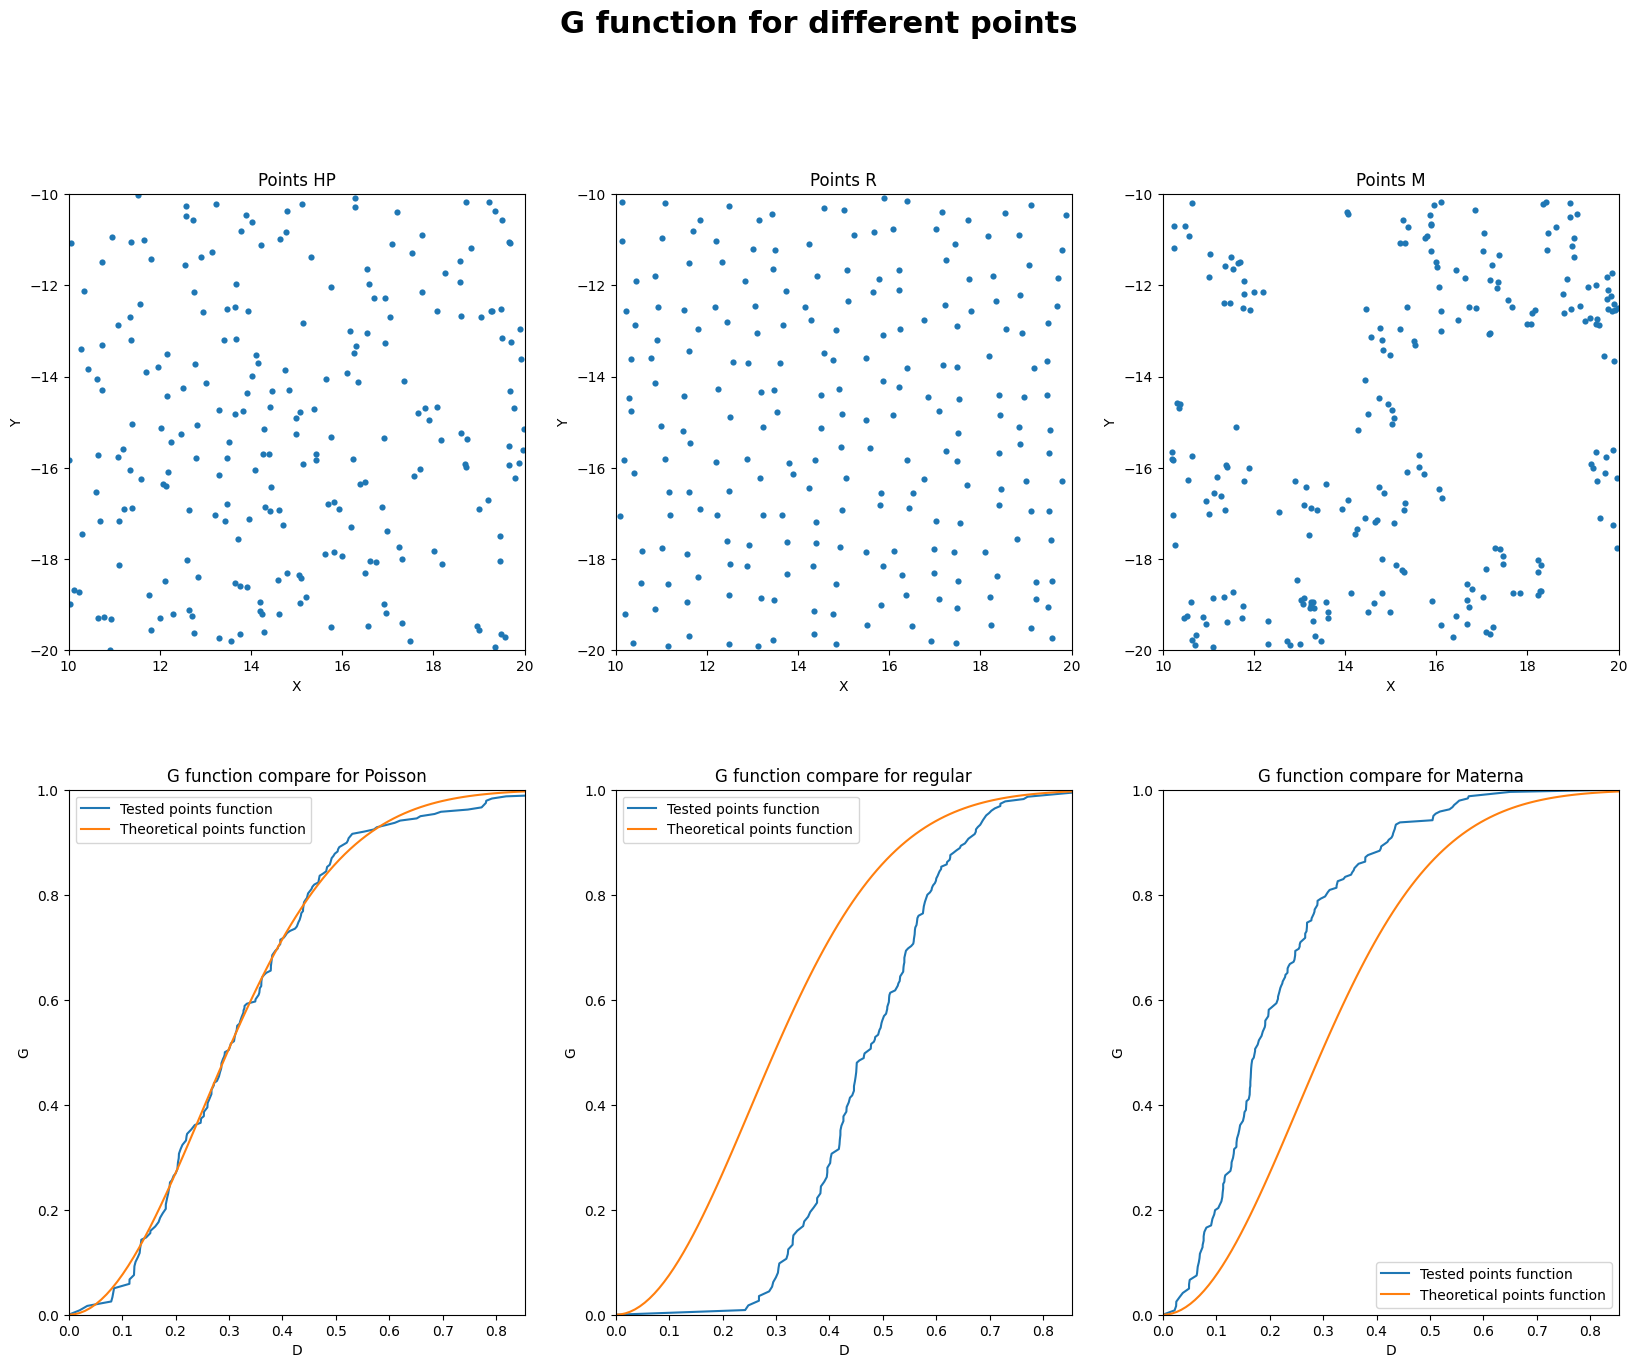

In [ ]:
x_lim=[10,20]
y_lim=[-20,-10]

results_HP = g_function(points_HP)
results_R = g_function(points_R)
results_M = g_function(points_M)

x_max = np.min([np.max(results_R.D), np.max(results_HP.D), np.max(results_M.D)])

theoretical_HP = g_function_poisson(np.linspace(0,np.max(results_HP.D),100),2.5)
theoretical_R = g_function_poisson(np.linspace(0,np.max(results_R.D),100),2.5)
theoretical_M = g_function_poisson(np.linspace(0,np.max(results_M.D),100),2.5)

figure,axes = plt.subplots(2,3,figsize=(20,15))
figure.suptitle(t="G function for different points", size = 22, weight = "bold")

axes[0,0].axis("square")
axes[0,0].set_title("Points HP")
axes[0,0].set_xlim(x_lim[0],x_lim[1])
axes[0,0].set_ylim(y_lim[0],y_lim[1])
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")
sns.scatterplot(data=points_HP, x="X", y="Y", ax=axes[0,0], s=20, linewidth=0)

axes[1,0].set_title("G function compare for Poisson")
axes[1,0].set_xlim(0,x_max)
axes[1,0].set_ylim(0,1)
axes[1,0].set_xlabel("D")
axes[1,0].set_ylabel("G")
axes[1,0].plot(results_HP.D,results_HP.G)
axes[1,0].plot(theoretical_HP.D, theoretical_HP.G)
axes[1,0].legend(['Tested points function', 'Theoretical points function'])

axes[0,1].axis("square")
axes[0,1].set_title("Points R")
axes[0,1].set_xlim(x_lim[0],x_lim[1])
axes[0,1].set_ylim(y_lim[0],y_lim[1])
axes[0,1].set_xlabel("X")
axes[0,1].set_ylabel("Y")
sns.scatterplot(data=points_R, x="X", y="Y", ax=axes[0,1], s=20, linewidth=0)

axes[1,1].set_title("G function compare for regular")
axes[1,1].set_xlim(0,x_max)
axes[1,1].set_ylim(0,1)
axes[1,1].set_xlabel("D")
axes[1,1].set_ylabel("G")
axes[1,1].plot(results_R.D,results_R.G)
axes[1,1].plot(theoretical_R.D, theoretical_R.G)
axes[1,1].legend(['Tested points function', 'Theoretical points function'])

axes[0,2].axis("square")
axes[0,2].set_title("Points M")
axes[0,2].set_xlim(x_lim[0],x_lim[1])
axes[0,2].set_ylim(y_lim[0],y_lim[1])
axes[0,2].set_xlabel("X")
axes[0,2].set_ylabel("Y")
sns.scatterplot(data=points_M, x="X", y="Y", ax=axes[0,2], s=20, linewidth=0)

axes[1,2].set_title("G function compare for Materna")
axes[1,2].set_xlim(0,x_max)
axes[1,2].set_ylim(0,1)
axes[1,2].set_xlabel("D")
axes[1,2].set_ylabel("G")
axes[1,2].plot(results_M.D,results_M.G)
axes[1,2].plot(theoretical_M.D, theoretical_M.G)
axes[1,2].legend(['Tested points function', 'Theoretical points function'])

### Zadanie 2: Funkcja F (18 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona.

Algorytm postępowania:
- Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy zestaw punktów pomiarowych dla tego samego zakresu współrzędnych, dla których został wygenerowany analizowany proces.
- Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
- Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
- Konstruujemy funkcję F jednorodnego rozkładu Poissona daną wzorem:<br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.
    
Uwagi do wykonania zadania:
- Generowane dane powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.
- Projektując funkcję `f_function()` uwzględnij fakt, że wiele punktów może mieć najbliższego sąsiada w takiej samej odległości.
- W procesie wyliczania dystansów do najbliższego sąsiada należy wykorzystać maksymalnie jedną pętlę `for` iterującą po kolejnych punktach, dla których wyliczamy dystans do ich najbliższego sąsiada. Nie należy korzystać z pętli `for` do wyliczania odległości pomiędzy poszczególnymi parami punktów.
- W części zadania dotyczącej generowania rozkładu pomiarowego nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `regular_on_rectangle()` lub `homogeneous_poisson_on_rectangle()`, którą można wkleić we wskazanej komórce na początku notatnika.

In [ ]:
def f_function(points, test_points):
    distances = sp.spatial.distance_matrix(test_points, points, p=2)
    distances_min = np.sort(np.array(distances.min(axis=1)))
    F = np.array([np.sum(distances_min <= distance)/len(distances_min) for distance in distances_min])
    if distances_min[0] != 0:
        distances_min = np.insert(distances_min, 0, 0)
        F = np.insert(F, 0, 0)
    return pd.DataFrame({"D" : np.unique(distances_min), "F" : np.unique(F)})
    
def f_function_poisson(d, intensity):
    distances_min = np.sort(np.array(d))
    F = 1 - np.exp(-intensity*np.pi*d*d)
    return pd.DataFrame({"D" : distances_min, "F" : F})

In [ ]:
# Komórka testowa           
test_results_3 = f_function(test_data_1, test_data_2)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (361, 2)
assert list(test_results_3.columns) == ["D", "F"]
assert np.isclose(test_results_3["D"].min(), 0.0)
assert np.isclose(test_results_3["D"].max(), 0.9705949267845364)
assert np.isclose(test_results_3["D"].mean(), 0.28619986281302456)
assert np.isclose(test_results_3["F"].min(), 0.0)
assert np.isclose(test_results_3["F"].max(), 1.0)
assert np.isclose(test_results_3["F"].mean(), 0.5147368421052632)

test_results_4 = f_function_poisson(np.linspace(0, np.max(test_results_3["D"]), 100), 2.5)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (100, 2)
assert list(test_results_4.columns) == ["D", "F"]
assert np.isclose(test_results_4["D"].min(), 0.0)
assert np.isclose(test_results_4["D"].max(), 0.9705949267845364)
assert np.isclose(test_results_4["D"].mean(), 0.4852974633922682)
assert np.isclose(test_results_4["F"].min(), 0.0)
assert np.isclose(test_results_4["F"].max(), 0.9993880615391438)
assert np.isclose(test_results_4["F"].mean(), 0.6724855209770033)

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. Ustaw identyczne zakresy osi wszystkich trzech wykresów funkcji F.

Uwagi do wykonania zadania:
- Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

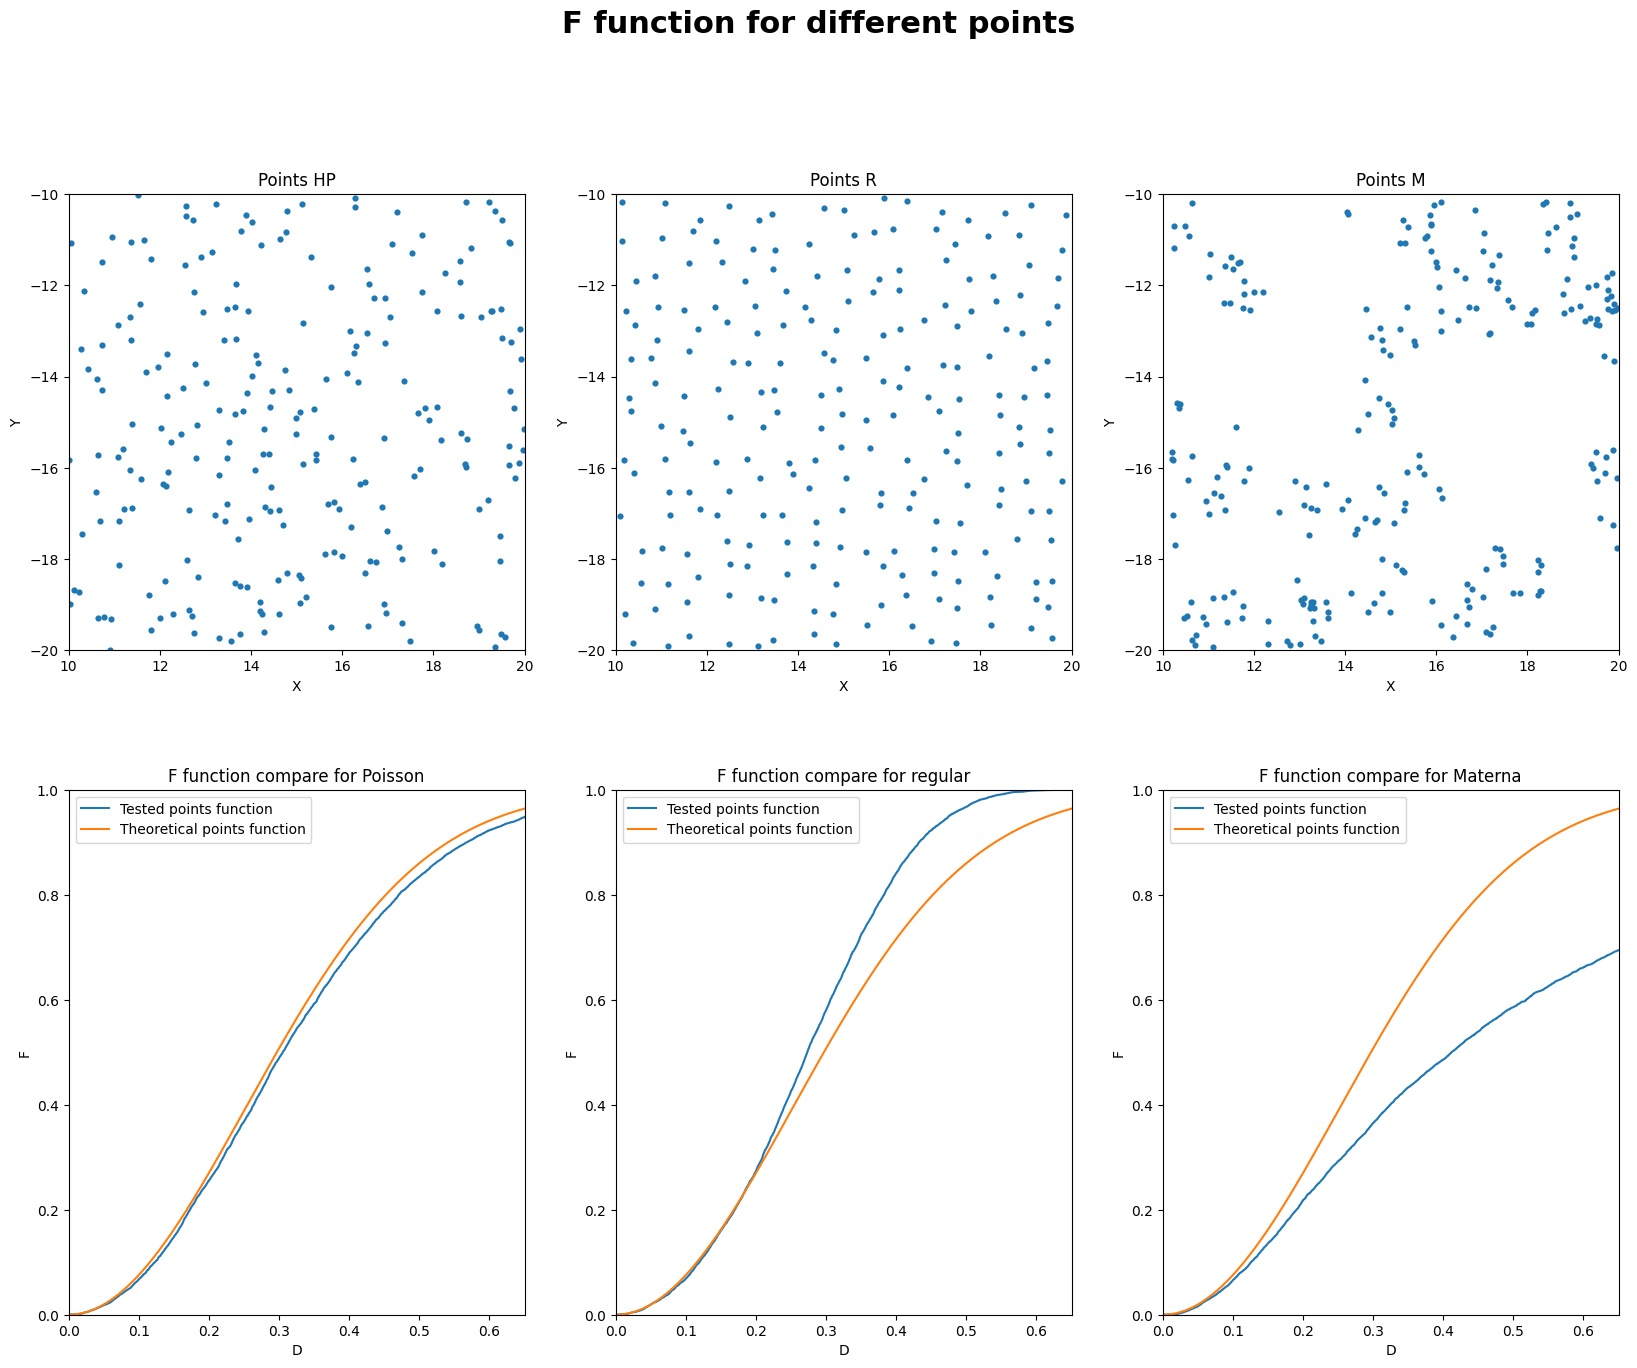

In [ ]:
x_lim=[10,20]
y_lim=[-20,-10]
test_points = homogeneous_poisson_on_rectangle(77,x_lim,y_lim)
results_HP = f_function(points_HP,test_points)
results_R = f_function(points_R,test_points)
results_M = f_function(points_M,test_points)
theoretical_HP = f_function_poisson(np.linspace(0,np.max(results_HP.D),2137),2.5)
theoretical_R = f_function_poisson(np.linspace(0,np.max(results_R.D),2137),2.5)
theoretical_M = f_function_poisson(np.linspace(0,np.max(results_M.D),2137),2.5)

figure,axes = plt.subplots(2,3,figsize=(20,15))
figure.suptitle(t="F function for different points", size = 22, weight = "bold")

axes[0,0].axis("square")
axes[0,0].set_title("Points HP")
axes[0,0].set_xlim(x_lim[0],x_lim[1])
axes[0,0].set_ylim(y_lim[0],y_lim[1])
axes[0,0].set_xlabel("X")
axes[0,0].set_ylabel("Y")
sns.scatterplot(data=points_HP, x="X", y="Y", ax=axes[0,0], s=20, linewidth=0)

axes[1,0].set_title("F function compare for Poisson")
axes[1,0].set_xlim(0,np.max(results_R.D))
axes[1,0].set_ylim(0,1)
axes[1,0].set_xlabel("D")
axes[1,0].set_ylabel("F")
axes[1,0].plot(results_HP.D,results_HP.F)
axes[1,0].plot(theoretical_HP.D, theoretical_HP.F)
axes[1,0].legend(['Tested points function', 'Theoretical points function'])

axes[0,1].axis("square")
axes[0,1].set_title("Points R")
axes[0,1].set_xlim(x_lim[0],x_lim[1])
axes[0,1].set_ylim(y_lim[0],y_lim[1])
axes[0,1].set_xlabel("X")
axes[0,1].set_ylabel("Y")
sns.scatterplot(data=points_R, x="X", y="Y", ax=axes[0,1], s=20, linewidth=0)

axes[1,1].set_title("F function compare for regular")
axes[1,1].set_xlim(0,np.max(results_R.D))
axes[1,1].set_ylim(0,1)
axes[1,1].set_xlabel("D")
axes[1,1].set_ylabel("F")
axes[1,1].plot(results_R.D,results_R.F)
axes[1,1].plot(theoretical_R.D, theoretical_R.F)
axes[1,1].legend(['Tested points function', 'Theoretical points function'])

axes[0,2].axis("square")
axes[0,2].set_title("Points M")
axes[0,2].set_xlim(x_lim[0],x_lim[1])
axes[0,2].set_ylim(y_lim[0],y_lim[1])
axes[0,2].set_xlabel("X")
axes[0,2].set_ylabel("Y")
sns.scatterplot(data=points_M, x="X", y="Y", ax=axes[0,2], s=20, linewidth=0)

axes[1,2].set_title("F function compare for Materna")
axes[1,2].set_xlim(0,np.max(results_R.D))
axes[1,2].set_ylim(0,1)
axes[1,2].set_xlabel("D")
axes[1,2].set_ylabel("F")
axes[1,2].plot(results_M.D,results_M.F)
axes[1,2].plot(theoretical_M.D, theoretical_M.F)
axes[1,2].legend(['Tested points function', 'Theoretical points function'])